In [82]:
#Train, val, Test splitter
import train_pytorch
import prepare_dataset
import random
import time 
from collections import Counter
import os
import numpy as np
import shutil
import codecs
#os.chdir("/Users/kjartan/Documents/CompCogSci3/") 
os.chdir(r"C:\Users\kjart\OneDrive\Dokumenter\KU\3. semester\Cog sci 3\CompCogSci3")

In [83]:
language = "CN"
unsorted_data_dir = "raw_data/derivatives/"
annotation_file = f"raw_data/annotation/{language}/lpp{language}_word_information.csv"
random.seed(1234)

pos = "NUM" #Change this to select labels
oov = "-1" #no need to change this
binary = False #ignore this


In [86]:
#Run this cell to load the data with the selected configuration, only need to run this cell if 
#you haven't loaded the data before, or if you want to change config

#Uncomment these two if you are changing config
#prepare_dataset.clear_data_dir()
#shutil.rmtree("aux_data/")

prepare_dataset.load_data(unsorted_data_dir, language=language)

config_version = prepare_dataset.config2("data/", split=(0.8,0.1,0.1), language=language)
#config_version = prepare_dataset.config1("data/", split=(0.8,0.1,0.1), language=language)

loading data.....
raw_data/derivatives/sub-CN001\func\sub-CN001_task-lppCN_run-04_space-MNIColin27_desc-preproc_bold.nii.gz
raw_data/derivatives/sub-CN001\func\sub-CN001_task-lppCN_run-05_space-MNIColin27_desc-preproc_bold.nii.gz
raw_data/derivatives/sub-CN001\func\sub-CN001_task-lppCN_run-06_space-MNIColin27_desc-preproc_bold.nii.gz
raw_data/derivatives/sub-CN001\func\sub-CN001_task-lppCN_run-07_space-MNIColin27_desc-preproc_bold.nii.gz
raw_data/derivatives/sub-CN001\func\sub-CN001_task-lppCN_run-08_space-MNIColin27_desc-preproc_bold.nii.gz
raw_data/derivatives/sub-CN001\func\sub-CN001_task-lppCN_run-09_space-MNIColin27_desc-preproc_bold.nii.gz
raw_data/derivatives/sub-CN001\func\sub-CN001_task-lppCN_run-10_space-MNIColin27_desc-preproc_bold.nii.gz
raw_data/derivatives/sub-CN001\func\sub-CN001_task-lppCN_run-11_space-MNIColin27_desc-preproc_bold.nii.gz
raw_data/derivatives/sub-CN001\func\sub-CN001_task-lppCN_run-12_space-MNIColin27_desc-preproc_bold.nii.gz
raw_data/derivatives/sub-CN0

In [87]:
#Only need to run this after an experiment if you want to change "pos", then run all the following cells

#Move data back from aux_data/
for phase in os.listdir("aux_data/"):
    for run in os.listdir(f"aux_data/{phase}"):
        path = f"aux_data/{phase}/{run}/{language}/"
        for file in os.listdir(path):
            file_path = f"data/{phase}/{run}/{language}/{file}"
            shutil.move(f"aux_data/{phase}/{run}/{language}/{file}",file_path)


In [88]:


prepare_dataset.prepare_labels(annotation_file, "data/", language, pos=pos, oov=oov)

#binary = prepare_dataset.convert_to_binary_labels("data/", oov, language) #Ignore

{0: ['岁', '一', '-1', '幅', '条', '只', '幅', '本', '-1', '-1', '-1', '六', '个', '-1', '-1', '-1', '幅', '号', '-1', '幅', '-1', '-1', '-1', '顶', '-1', '-1', '头', '-1', '-1', '-1', '-1', '-1', '第二', '第二', '-1', '-1', '-1', '-1', '-1', '-1', '年', '一', '第二', '-1', '-1', '-1', '-1', '-1', '个', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '许多', '很多', '-1', '-1', '-1', '-1', '个', '-1', '-1', '号', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '些', '-1', '-1', '-1', '个', '-1', '个', '个', '年', '次', '个', '-1', '-1', '-1', '-1', '个', '-1', '一', '天', '-1', '-1', '-1', '第二', '个', '-1', '-1', '-1', '-1', '只', '一', '只', '-1', '-1', '-1', '-1', '-1', '-1', '一', '-1', '-1', '-1', '-1', '岁', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '里', '-1', '-1', '-1', '-1', '-1', '个', '-1', '-1', '-1', '-1', '-1', '-1', '件', '-1', '只', '种', '-1', '-1', '-1', '-1', '-1', '-1', '支', '-1', '-1', '-1', '-1', '-1', '-1', '只', '只', '-1', '幅', '幅', '-1', '-1', '-1', '-1', '头', '-1', '-1', '只', '只', '-1', '-1', '-1', '只', '-1', '只', '位', '-

In [89]:
#Finds the labels 
all_labels = []
for i in os.listdir("data"):
    if os.path.isdir("data/"+i):
        for phase in os.listdir("data/"+i):
            for run in range(9):
                path = f"data/{i}/{run}/{language}/labels.txt"
                with open(path, "r") as f:
                    lines = f.readlines()
                    for l in lines:
                        all_labels.append(l.strip("\n"))



most_common = Counter(all_labels).most_common()
label_dict = {}
with codecs.open("label_dict.txt", "r", encoding="utf-8") as f:
    for i in f.readlines():
        k = i.split("=")
        label_dict[k[1].strip("\n ")] = k[0]
most_common_lemmas = []
for i in range(len(most_common)):
    lbl = most_common[i][0]
    most_common_lemmas.append((label_dict[lbl], most_common[i][1]))



In [90]:
vocab15 = []
off_set = 1 # to exclude the most frequent words which leads to overfitting
label_stats = most_common_lemmas[off_set+1:15+off_set+1]
for w, _ in label_stats: #top 15 words
    vocab15.append(w.strip())
    
print(vocab15)
print(label_stats)
print(most_common_lemmas[1:off_set+1])

['一', '只', '朵', '颗', '种', '天', '位', '次', '座', '年', '些', '分钟', '幅', '一些', '句']
[('一 ', 1053), ('只 ', 999), ('朵 ', 864), ('颗 ', 810), ('种 ', 702), ('天 ', 621), ('位 ', 486), ('次 ', 459), ('座 ', 405), ('年 ', 378), ('些 ', 324), ('分钟 ', 297), ('幅 ', 270), ('一些 ', 270), ('句 ', 270)]
[('个 ', 4401)]


In [91]:

prepare_dataset.prepare_handpicked_labels(annotation_file, "data/", vocab15, oov=oov, language=language)

{0: ['-1', '一', '-1', '幅', '一', '只', '幅', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '幅', '-1', '-1', '幅', '-1', '-1', '-1', '一', '-1', '-1', '一', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '年', '一', '-1', '-1', '-1', '-1', '-1', '-1', '一', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '一', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '些', '-1', '-1', '-1', '一', '-1', '一', '-1', '年', '次', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '一', '天', '-1', '-1', '-1', '-1', '一', '-1', '-1', '-1', '-1', '只', '一', '只', '-1', '-1', '-1', '-1', '-1', '-1', '幅', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '一', '-1', '-1', '-1', '-1', '-1', '-1', '一', '-1', '只', '种', '-1', '-1', '-1', '-1', '-1', '-1', '一', '-1', '只', '-1', '-1', '-1', '-1', '只', '只', '-1', '幅', '幅', '-1', '-1', '-1', '-1', '一', '-1', '-1', '只', '只', '-1', '-1', '-1', '只', '-1', '只

In [92]:
#Exclude data that corresponds to oov
with codecs.open("label_dict.txt", "r", encoding="utf-8") as f:
    for i in f.readlines():
        k = i.split("=")
        if k[0].strip() == oov:
            label_2_remove = int(k[1].strip("\n "))
            break
print(label_2_remove)
labels_dict = {}
for i in os.listdir("data"):
    if os.path.isdir("data/"+i):
        for phase in os.listdir("data/"+i):
            for run in range(9):
                labels = np.loadtxt(f"data/{i}/{run}/{language}/labels.txt")
                labels_dict[run] = labels

exclusion_idxs = {k:[] for k in range(9)}

for run in labels_dict.keys():
    for idx, label in enumerate(labels_dict[run]):
        if label==label_2_remove:
            exclusion_idxs[run].append(idx)


for i in os.listdir("data"):
    if os.path.isdir("data/"+i):
        for phase in os.listdir("data/"+i):
            for run in range(9):
                path = f"data/{i}/{run}/{language}/labels.txt"
                with open(path, "r") as f:
                    lines = f.readlines()
                with open(path, "w") as f:
                    for line in lines:
                        if line.strip("\n ") != str(label_2_remove):
                            f.write(line)

count = 0
for phase in os.listdir("data/"):
    for run in range(9):
        path = f"data/{phase}/{run}/{language}/"
        for file in os.listdir(path):
            if file.endswith(".txt"):
                continue
            file_path = f"data/{phase}/{run}/{language}/{file}"
            idx = file.split("_")[-1][:-4]
            if int(idx) in exclusion_idxs[run]:
                count +=1 
                dest = f"aux_data/{phase}/{run}/{language}/"
                if not os.path.exists(dest):
                    os.makedirs(dest)
                shutil.move(file_path, f"aux_data/{phase}/{run}/{language}/")
                
print("moved ", count, " files")


0
moved  79893  files


In [93]:

def count_files():
    counts = {}
    # Iterate directory
    for phase in os.listdir("data"):
        if os.path.isdir("data/"+phase):
            count=0
            for run in os.listdir(f"data/{phase}/"):
                for file in os.listdir(f"data/{phase}/{run}/{language}"):
                    if file.endswith(".npy"):
                        count += 1
        counts[phase] = count
    return counts

count_files()

{'Test': 1715, 'Train': 13675, 'Val': 1770}

In [94]:
def calc_baseline(lbl = "data/Test/", language = "EN"):
    prob = 0
    labels = []
    for run in os.listdir(lbl):
        path = lbl +"/"+ run + "/" + language
        multiplier = len(os.listdir(path))-1
        if multiplier>0:
            for _ in range(int(multiplier/len(np.loadtxt(path+"/labels.txt")))):
                labels.append(np.loadtxt(path+"/labels.txt"))
    labels = np.concatenate(labels).ravel()
    total = labels.size
    label_c = Counter(labels)
    for _, v in label_c.items():
        prob += (v/total)**2
    return prob

calc_baseline(language=language)

0.20288505505720872

In [95]:
#Write a log
import json
import datetime
with codecs.open("config_stats.txt", "a", encoding="utf-8") as f:
    f.write("\n")
    f.write(f"{datetime.datetime.now()}\n")
    f.write(pos + "\n")
    f.write(f"{off_set+1}th to {off_set+15}th\n")
    for i in vocab15:
        f.write(str(i) + ", ")
    f.write("\n")
    f.write(json.dumps(count_files()))
    f.write("\n")
f.close()

In [96]:
batch_size=50
config = f"{config_version}_{language}_top15{pos}"


2022-12-13 21:05:35.614277
cuda
Epoch 1/10
-------------
{'train': <torch.utils.data.dataloader.DataLoader object at 0x000002A142598340>, 'valid': <torch.utils.data.dataloader.DataLoader object at 0x000002A167BBAC80>, 'test': <torch.utils.data.dataloader.DataLoader object at 0x000002A167BBAE30>}


c:\Users\kjart\OneDrive\Dokumenter\KU\3. semester\Cog sci 3\CompCogSci3\mt_deep-master\scripts\model_m2dcnn.py:78: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  nn.init.xavier_uniform(m.weight, gain=nn.init.calculate_gain('relu'))


 36.56 %
 73.13 %
##### train Loss: 2.5118 Acc: 0.2849 #####
{'train': <torch.utils.data.dataloader.DataLoader object at 0x000002A142598340>, 'valid': <torch.utils.data.dataloader.DataLoader object at 0x000002A167BBAC80>, 'test': <torch.utils.data.dataloader.DataLoader object at 0x000002A167BBAE30>}
##### valid Loss: 2.1677 Acc: 0.4141 #####
Epoch 2/10
-------------
{'train': <torch.utils.data.dataloader.DataLoader object at 0x000002A142598340>, 'valid': <torch.utils.data.dataloader.DataLoader object at 0x000002A167BBAC80>, 'test': <torch.utils.data.dataloader.DataLoader object at 0x000002A167BBAE30>}
 36.56 %
 73.13 %
##### train Loss: 2.2130 Acc: 0.4081 #####
{'train': <torch.utils.data.dataloader.DataLoader object at 0x000002A142598340>, 'valid': <torch.utils.data.dataloader.DataLoader object at 0x000002A167BBAC80>, 'test': <torch.utils.data.dataloader.DataLoader object at 0x000002A167BBAE30>}
##### valid Loss: 2.1628 Acc: 0.4141 #####
Epoch 3/10
-------------
{'train': <torch.utils

  0%|          | 0/35 [00:00<?, ?it/s]

Test Accuracy: 0.4152


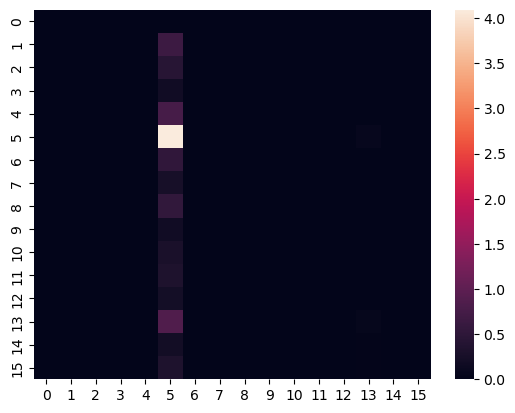

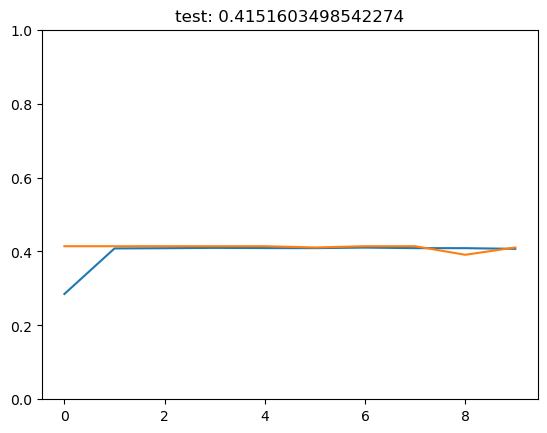

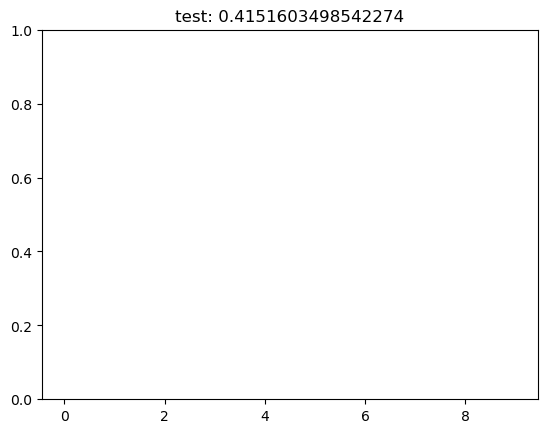

0:28:21.597895


In [97]:

train_pytorch.train(binary=False, batch_size = batch_size, num_epochs = 10, language=language, config=config, model = "2d", weights=None)

16


  0%|          | 0/35 [00:00<?, ?it/s]

Test Accuracy: 0.4152


(M2DCNN(
   (up_conv): Conv2d(
     (conv_block): Sequential(
       (0): Conv2d(73, 16, kernel_size=(3, 3), stride=(1, 1))
       (1): mish()
       (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
       (3): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
       (5): mish()
       (6): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
       (7): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     )
   )
   (front_conv): Conv2d(
     (conv_block): Sequential(
       (0): Conv2d(90, 16, kernel_size=(3, 3), stride=(1, 1))
       (1): mish()
       (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
       (3): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1)

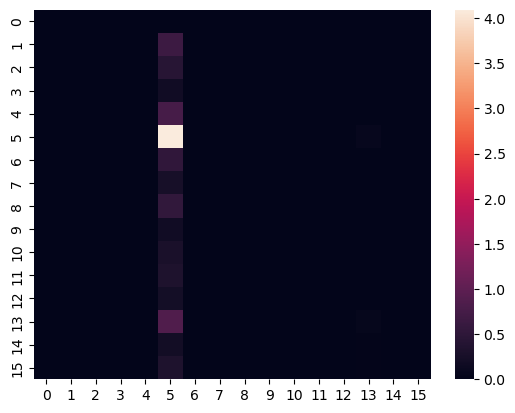

In [98]:
import model_m2dcnn as model
from torch.utils.data import DataLoader
from dataset import lpp_Dataset

batch_size = 50
binary = False
test_dataloader = DataLoader(lpp_Dataset("data/Test/", language=language), batch_size=batch_size, shuffle=False)
if binary:
        nb_classes = 2
else:
    with codecs.open("label_dict.txt", "r", encoding="utf-8") as f:
        nb_classes = len(f.readlines())
      
print(nb_classes)
train_pytorch.test(model.M2DCNN(numClass=nb_classes, numFeatues=30880, DIMX=74, DIMY=90, DIMZ=73), config,f"results/{config}_weights.pth", nb_classes, test_dataloader)